In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
model = Sequential()
# input: 28x28 images with 1 channel -> (28, 28, 1) tensors.
# this applies 16 convolution filters of size 3x3 each.
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.fit(x_train, x_train, batch_size=32, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.1600
Epoch 2/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1231
Epoch 3/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.1150
Epoch 4/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.1103
Epoch 5/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.1073
Epoch 6/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.1050
Epoch 7/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1038
Epoch 8/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.1024
Epoch 9/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.1014
Epoch 10/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1005


In [0]:
out_images = model.predict(x_test)


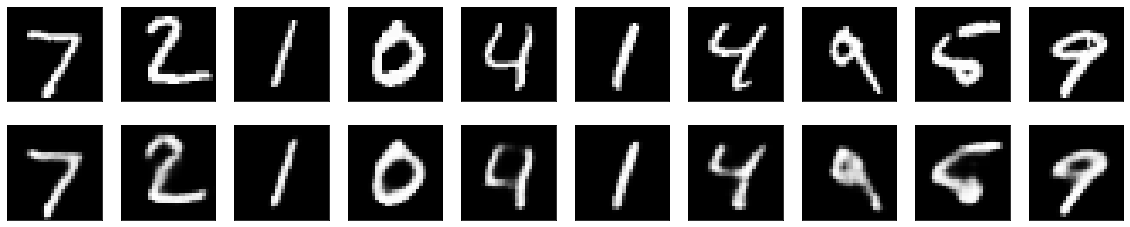

In [8]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(out_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
